<a href="https://colab.research.google.com/github/Mahendrakharade/Data-Analysis-using-Python/blob/main/Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Libraries
import pandas as pd
import numpy as np

**Import Data Sets**

In [3]:
#import Datasets
data=pd.read_csv("Covid Data.csv")
data.head()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,31-12-2019,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0,Asia
1,31-12-2019,31,12,2019,0,0,Algeria,DZ,DZA,42228429.0,Africa
2,31-12-2019,31,12,2019,0,0,Armenia,AM,ARM,2951776.0,Europe
3,31-12-2019,31,12,2019,0,0,Australia,AU,AUS,24992369.0,Oceania
4,31-12-2019,31,12,2019,0,0,Austria,AT,AUT,8847037.0,Europe


In [4]:
# Check Duplicates
#d=data.duplicated()
#d=data.drop_duplicates()


In [5]:
# Dealing with mising values
data.isnull().sum()
#data1=data.apply(lambda x:x.fillna(x.mean()) if x.dtype=="float" else x.fillna(x.value_counts().index[0]))

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                       72
countryterritoryCode       260
popData2018                261
continentExp                 0
dtype: int64

In [6]:
#select required Data
data1=data.filter(["dateRep","day","month","year","cases","deaths","countryterritoryCode","continentExp"])
data1.head()

,dateRep,day,month,year,cases,deaths,countryterritoryCode,continentExp
0,31-12-2019,31,12,2019,0,0,AFG,Asia
1,31-12-2019,31,12,2019,0,0,DZA,Africa
2,31-12-2019,31,12,2019,0,0,ARM,Europe
3,31-12-2019,31,12,2019,0,0,AUS,Oceania
4,31-12-2019,31,12,2019,0,0,AUT,Europe


In [7]:
# Check Data information
data1.dtypes
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19248 entries, 0 to 19247
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   dateRep               19248 non-null  object
 1   day                   19248 non-null  int64 
 2   month                 19248 non-null  int64 
 3   year                  19248 non-null  int64 
 4   cases                 19248 non-null  int64 
 5   deaths                19248 non-null  int64 
 6   countryterritoryCode  18988 non-null  object
 7   continentExp          19248 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.2+ MB


In [8]:
# Filter Data by Country
model_data=data1[data1.countryterritoryCode=='IND']
model_data.head()

,dateRep,day,month,year,cases,deaths,countryterritoryCode,continentExp
27,31-12-2019,31,12,2019,0,0,IND,Asia
94,01-01-2020,1,1,2020,0,0,IND,Asia
161,02-01-2020,2,1,2020,0,0,IND,Asia
228,03-01-2020,3,1,2020,0,0,IND,Asia
295,04-01-2020,4,1,2020,0,0,IND,Asia


In [9]:
import datetime

In [10]:
# Convert object to date and sort data
model_data=model_data.sort_values(by=["dateRep"])
model_data['dateRep']=pd.to_datetime(model_data['dateRep'],dayfirst=True)
model_data.tail()

,dateRep,day,month,year,cases,deaths,countryterritoryCode,continentExp
7613,2020-03-30,30,3,2020,92,4,IND,Asia
13923,2020-04-30,30,4,2020,1718,67,IND,Asia
2104,2020-01-31,31,1,2020,0,0,IND,Asia
7806,2020-03-31,31,3,2020,180,3,IND,Asia
27,2019-12-31,31,12,2019,0,0,IND,Asia


In [11]:
ts_Data=model_data.filter(["dateRep","cases","deaths"])
ts_Data.dtypes

dateRep    datetime64[ns]
cases               int64
deaths              int64
dtype: object

In [12]:
ts_Data.set_index("dateRep",inplace=True)
ts_Data.head()

,cases,deaths
dateRep,,
2020-01-01,0,0
2020-02-01,0,0
2020-03-01,0,0
2020-04-01,146,3
2020-05-01,1993,73


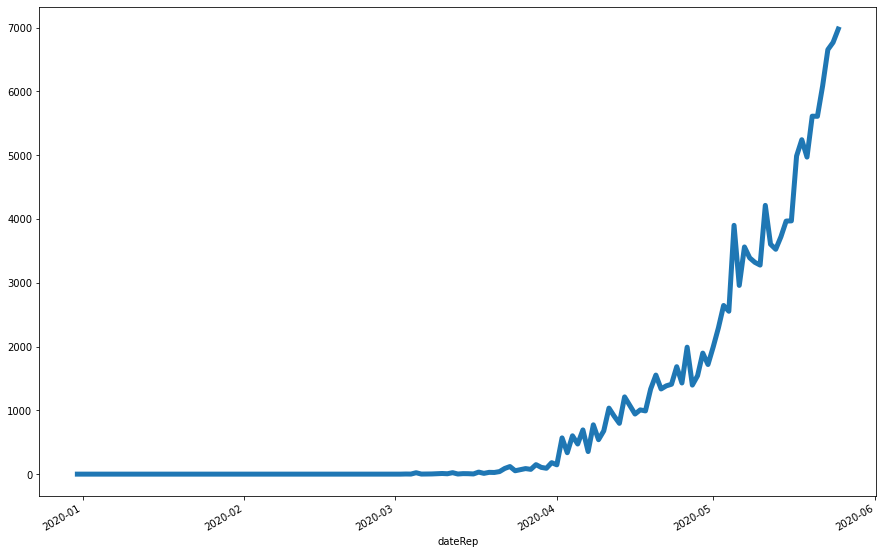

In [13]:
import matplotlib.pyplot as plt

ts_Data["cases"].plot(figsize=(15,10),linewidth=5)
plt.show()

In [14]:
data2=ts_Data[["cases"]]

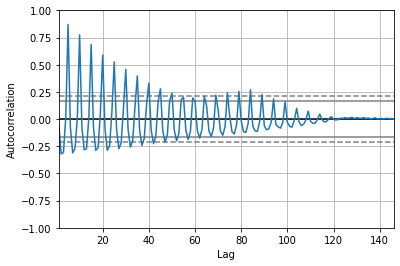

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data2)

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data2,order=(0,1,2))
model_fit=model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                D.cases   No. Observations:                  145
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1275.606
Method:                       css-mle   S.D. of innovations           1579.049
Date:                Wed, 30 Dec 2020   AIC                           2559.212
Time:                        11:06:20   BIC                           2571.119
Sample:                             1   HQIC                          2564.051
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8989     12.459      0.152      0.879     -22.520      26.318
ma.L1.D.cases    -1.6665      0.053    -31.671      0.000      -1.770      -1.563
ma.L2.D.cases     0.7600      0.063     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


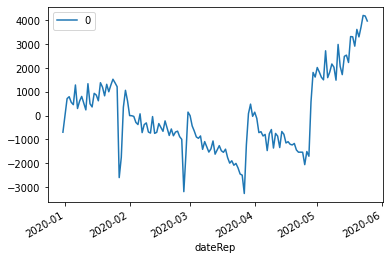

In [17]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()


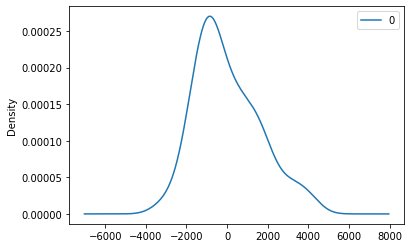

,0
count,145.000000
mean,13.981252
std,1587.979705
min,-3276.891890
25%,-1152.486447
50%,-377.906931
75%,1060.597764
max,4208.056964


In [18]:
residuals.plot(kind="kde")
plt.show()
residuals.describe()

In [19]:
x=data2
size=int(len(x)*.7)
size
train,test=x[0:size],x[size:len(x)]


# New Section